In [1]:
!pip install pandas numpy scikit-learn matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
data = pd.read_csv('IBM2017.csv')

In [4]:
# Ensure the 'Date' column is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
# Prepare the time series data
y = data['Close']  # Target: closing price

In [6]:
# Prepare the time series data
y = data['Close']  # Target: closing price

# Create lagged features
def create_lagged_features(series, lags=5):
    df = pd.DataFrame(series)
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Close'].shift(lag)
    return df.dropna()

lags = 5
data_lagged = create_lagged_features(y, lags)

In [7]:
# Split the data into training and test sets
train_size = int(len(data_lagged) * 0.8)
train_data = data_lagged.iloc[:train_size]
test_data = data_lagged.iloc[train_size:]

In [8]:
# Separate features and target
X_train = train_data.drop('Close', axis=1)
y_train = train_data['Close']
X_test = test_data.drop('Close', axis=1)
y_test = test_data['Close']

In [9]:

# Normalize the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [10]:
# Normalize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [11]:
# Fit the SVM model
model = SVR(kernel='rbf', C=100, gamma=0.1)
model.fit(X_train_scaled, y_train_scaled)

SVR(C=100, gamma=0.1)

In [12]:

# Predict the future values
y_pred_scaled = model.predict(X_test_scaled)

In [13]:
# Inverse transform the scaled predictions and actual values
y_test_inv = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

In [14]:
# Evaluate performance
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.014097342999266207


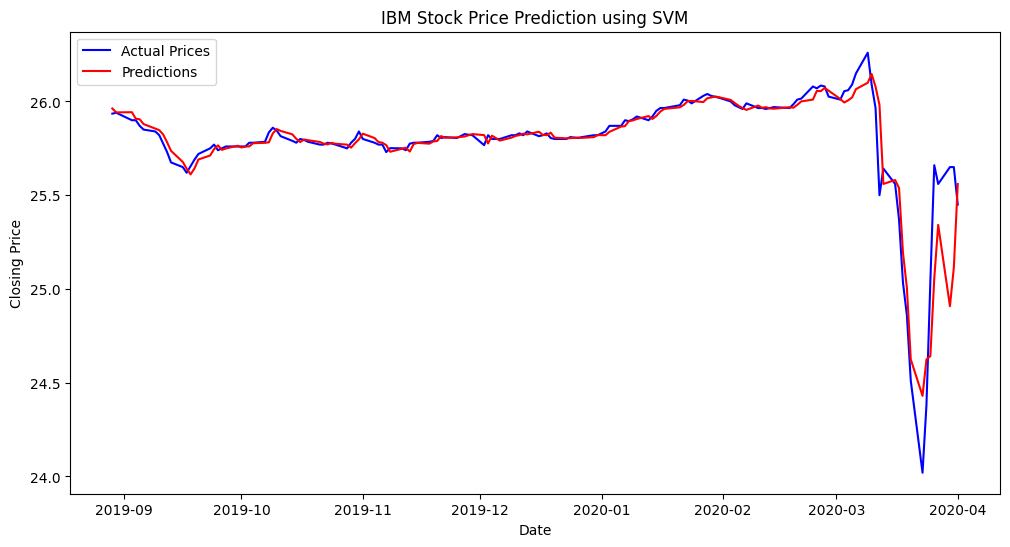

In [15]:
# Plot for visualization of results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test_inv):], y_test_inv, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_pred_inv):], y_pred_inv, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('IBM Stock Price Prediction using SVM')
plt.legend()
plt.show()

Explanation of the Script:

    Install Required Libraries:
        Install pandas, numpy, scikit-learn, and matplotlib using !pip install.

    Load the Data:
        Read the IBM stock data from IBM2017.csv.

    Prepare the Time Series Data:
        Use the Close column as the target variable.

    Create Lagged Features:
        Generate lagged features to help the model use past information for predictions.

    Split the Data:
        Split the data into training and test sets.

    Normalize the Features and Target:
        Normalize both the features and target variable to improve model performance.

    Fit the SVM (Support Vector Machines ) Model:
        Train an SVM model with radial basis function (RBF) kernel.

    Predict Future Values:
        Use the trained model to forecast future values.

    Evaluate Performance:
        Calculate the Mean Squared Error (MSE) between actual and predicted values.

    Plot Results:
        Visualize the actual versus predicted closing prices.

Notes:

    Ensure the file path 'IBM2017.csv' is correct and that the CSV file contains the necessary columns.
    The lags parameter determines how many past values to include as features. Adjust as needed based on your data.
    The hyperparameters C and gamma for the SVM model can be tuned for better performance.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>